### Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Goals and Objectives

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

With close to 35 predictor variables we need to select the most promising leads, i.e. the leads that are most likely to convert into paying customers for education company X Education which sells online courses to industry professionals. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
#Reading the dataset
leads=pd.read_csv("C:/Users/sensa/OneDrive/Desktop/Upgrad/Course 3/Lead_Scoring_Case_Study/Leads.csv")

In [3]:
#checking for  duplicates in the dataset by considering 'Prospect ID' to be unique
sum(leads.duplicated(subset='Prospect ID')) == 0
#The output 'True' indicates that there are no duplicates

True

## DATA CLEANING

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#Checking the percentage of null values column-wise
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#Target Variable Analysis
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [9]:
# From the dataset, we observe that there are 'select' values for many columns.
#We know from the problem statement that the value 'Select' is as good as Null/NaNs since it means that an individual 
#has not chosen any value from the dropdowns.Hence converting all the 'Select' values to 'Nan'

# Converting 'Select' value to NaN.
leads = leads.replace('Select', np.nan)
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Dropping columns with more than 30% Null Values
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number','Specialization'],axis=1)

In [11]:
#remove columns with single values
leads.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [12]:
leads=leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [13]:
#Checking the percentage of null values column-wise and seeing that we only have those columns that are required for this business objective
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Plot representing the continuous variables against the target variable


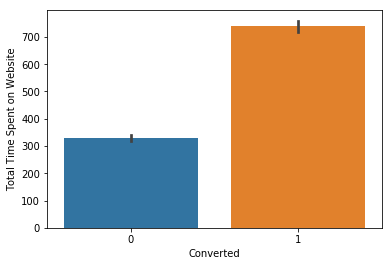

In [14]:
sns.barplot(x=leads['Converted'],y=leads['Total Time Spent on Website']) 
##As there is good amount of variance so this variable can be a good predictor

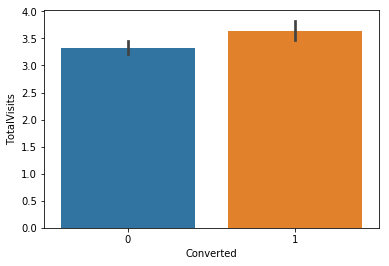

In [15]:
sns.barplot(x=leads['Converted'],y=leads['TotalVisits']) 
##As there is NO significant variance so this variable may not be good predictor

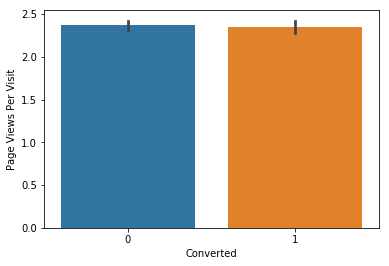

In [16]:
sns.barplot(x=leads['Converted'],y=leads['Page Views Per Visit']) 
##As there is no significant variance so this variable may not be good predictor

In [17]:
#leads.Specialization.describe()

In [18]:
#leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [19]:
#sns.countplot(leads.Specialization)
#xticks(rotation = 90)

In [20]:
leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [21]:
#Country is 'India' for most of the values and hence imputing the same for the missing values.
leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [22]:
leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [23]:
#The majority of the values is 'Unemployed' and hence imputing the missing values with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [24]:
leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [25]:
#Imputing the missing values in this with the most common value 'Better Career Prospects'
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [26]:
# missing values are under 2% for 'Page Views Per Visit' and 'Last Activity' so we can drop these rows.
leads.dropna(inplace = True)

In [27]:
#Again Checking the percentage of null values column-wise to see if they are all down to 0
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [28]:
leads.to_csv('Leads_cleaned')

### DATA ANALYSIS AND EDA

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [29]:
#Univariate Analysis
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

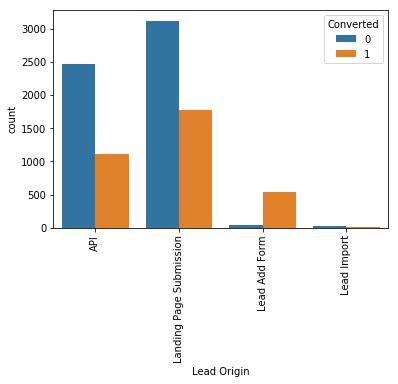

In [30]:
#Plotting a graph for 'Lead Origin'
sns.countplot(x = "Lead Origin", hue="Converted", data = leads)
xticks(rotation = 90)

### Inference
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.<br>


__To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

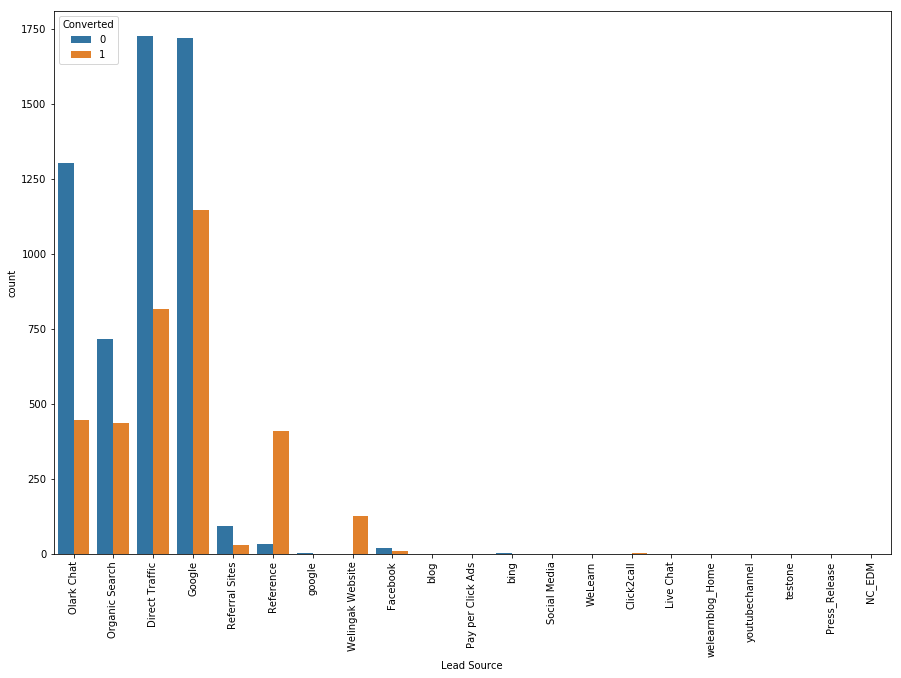

In [31]:
#Lead Source
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
xticks(rotation = 90)

#### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

__To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__

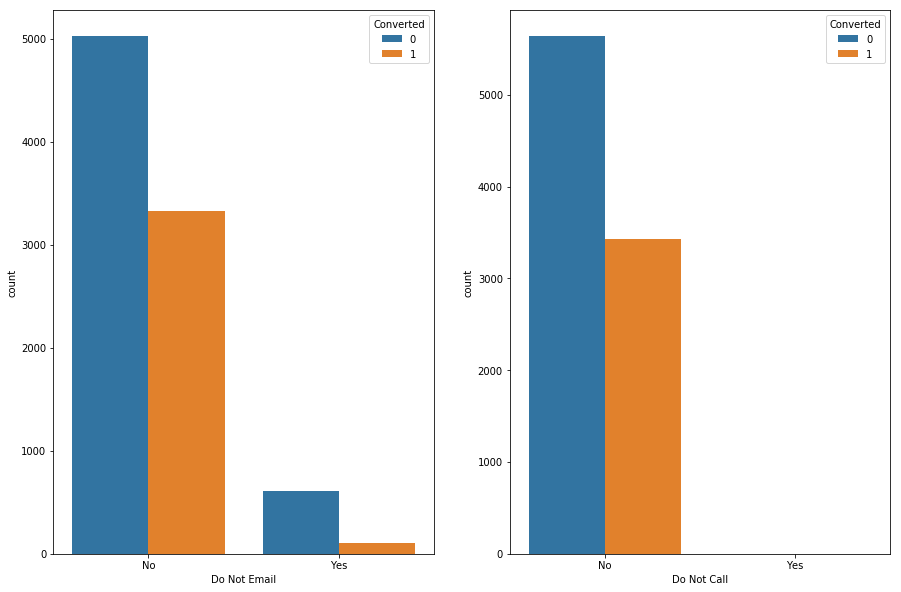

In [32]:
#Do NOt Email and Do Not Call
fig, axs = plt.subplots(1,2,figsize = (15,10))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, ax = axs[1])

In [33]:
#Total Visits
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

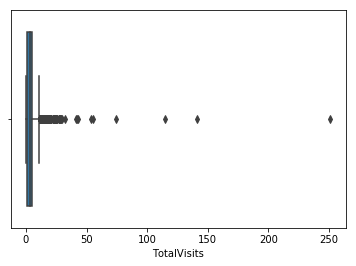

In [34]:
#Box plot to represent the data
sns.boxplot(leads['TotalVisits'])

Based on the boxplot,we can observe a number of outliers in the data.Fixingthe outliers to 95% value for analysis.

In [35]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

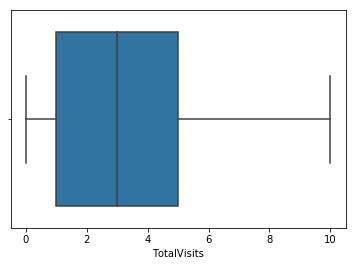

In [36]:
sns.boxplot(leads['TotalVisits'])

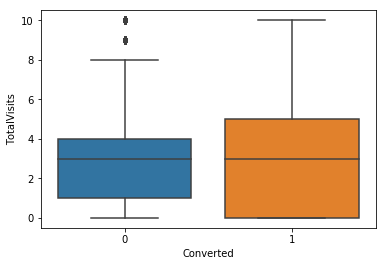

In [37]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

#### Result
1. Median for converted and not converted leads are the same.

__Nothng conclusive can be said on the basis of Total Visits.__

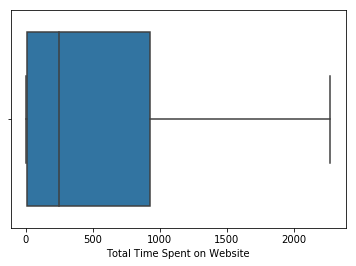

In [38]:
#Total time spent on the website
sns.boxplot(leads['Total Time Spent on Website'])

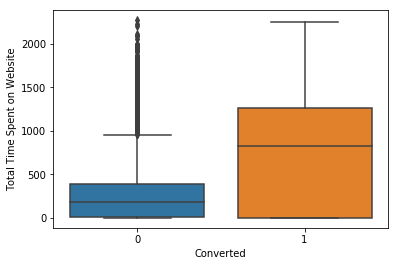

In [39]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)

#### Analysis
1. Leads spending more time on the weblise are more likely to be converted.

__Website should be made more engaging to make leads spend more time.__

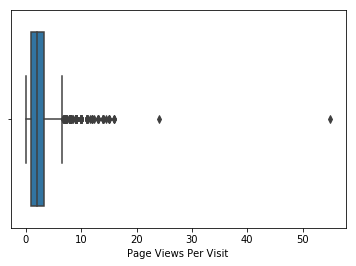

In [40]:
#Page Views per visit
sns.boxplot(leads['Page Views Per Visit'])

In [41]:
#Since we see a few outliers, we cap the outliers to 95% for our analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

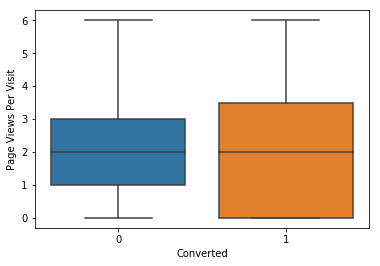

In [42]:
sns.boxplot(y ='Page Views Per Visit', x = 'Converted', data = leads)

#### Analysis
1. Median for converted and unconverted leads is the same.

__Nothing can be said specifically for lead conversion from Page Views Per Visit __

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

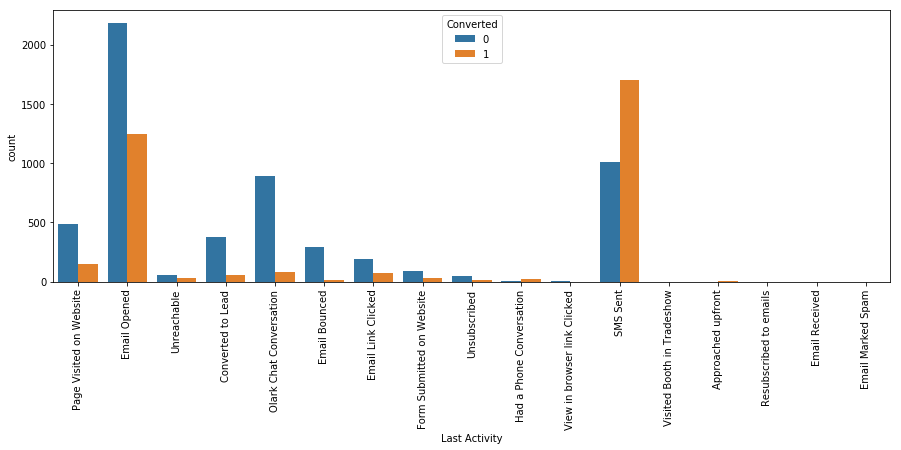

In [43]:
#Last Activity
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
xticks(rotation = 90)

In [44]:
#Retaining only the most significant last activities and combining all the others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

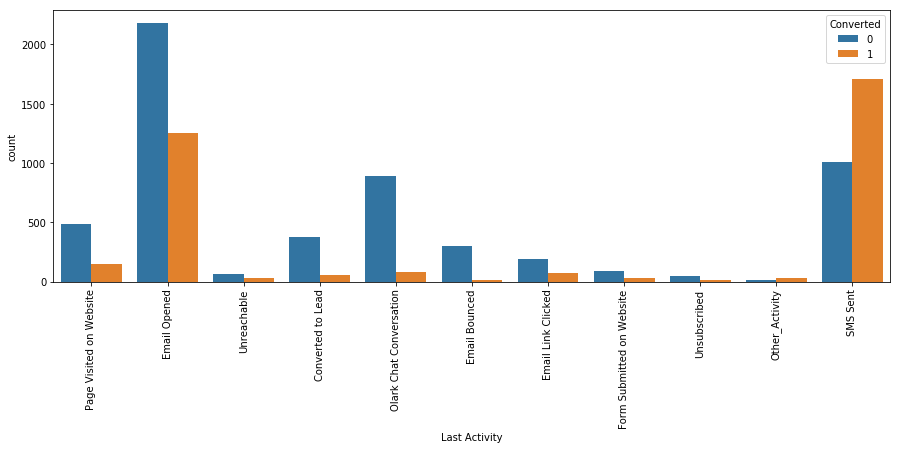

In [45]:
#Re-plotting Last Activity bar graph for more clarity
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
xticks(rotation = 90)

#### Result
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

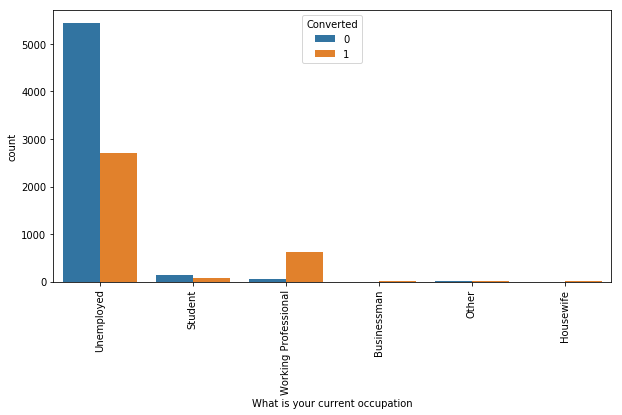

In [46]:
#What is your current occupation 
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
xticks(rotation = 90)

### Result
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

###  Results from other columns
1. For the column 'Country', most of the values are 'India' and no major inferences can be drawn out of this.
2. For the column 'What matters most to you in choosing a course' , most values are 'Better Career Prospects' and no major inferences can be drawn.
3. For the column 'Search' , most values are 'No' and no major inferences can be drawn.
4. For the column 'Inference' , most values are 'No' and no major inferences can be drawn.
5. For the column 'Newspaper Article' , most values are 'No' and no major inferences can be drawn.
6. For the column 'X Eductaion forum' , most values are 'No' and no major inferences can be drawn.
7. For the column 'Newspaper' , most values are 'No' and no major inferences can be drawn.
8. For the column 'Digital advertisement' , most values are 'No' and no major inferences can be drawn.
9. For the column 'Through Recommendations' , most values are 'No' and no major inferences can be drawn.
10. For the column 'Receive More Updates About Our Courses' , most values are 'No' and no major inferences can be drawn.
11. For the column 'Update me on Supply Chain Content' , most values are 'No' and no major inferences can be drawn.
12. For the column 'Get updates on DM Content', most values are 'No' and no major inferences can be drawn.
13. For the column 'I agree to pay the amount through cheque', most values are 'No' and no major inferences can be drawn.
14. For the column 'A free copy of Mastering The Interview', most values are 'No' and no major inferences can be drawn.


In [47]:
#Last Notable Activity
leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

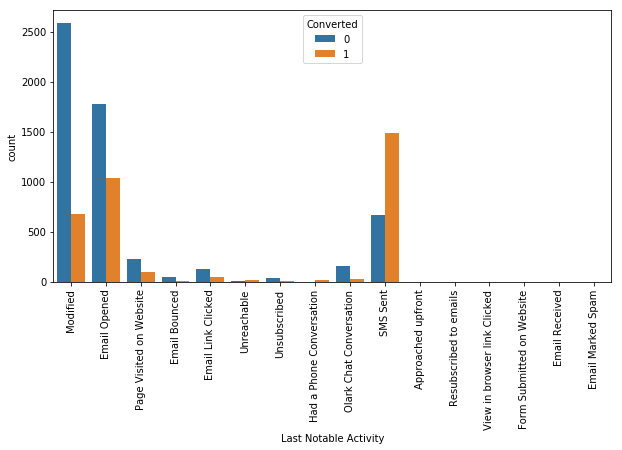

In [48]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
xticks(rotation = 90)

### Observations :

__Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis__

In [49]:
leads = leads.drop(['What matters most to you in choosing a course','Search','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country'],1)

In [50]:
#Re-checking the basic characteristics after EDA
leads.shape

(9074, 12)

In [51]:
leads

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,Unemployed,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Unemployed,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,Unemployed,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,Unemployed,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,No,0,4.0,58,4.00,Email Opened,Unemployed,Email Opened


In [52]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                        0.0
Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Do Not Call                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

### PREPARING THE DATA FOR MODEL BUILDING
 
In this step, for the categorical variables with binary values, we convert them to 1 and O and for other categorical variables, we create dummies using the one-hot encoding approach

In [53]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [54]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.'
dummy_var = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy_var], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity'], axis = 1)

### MODEL BUILDING

In [57]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)

In [58]:
# Assigning the response variable 'Converted' to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

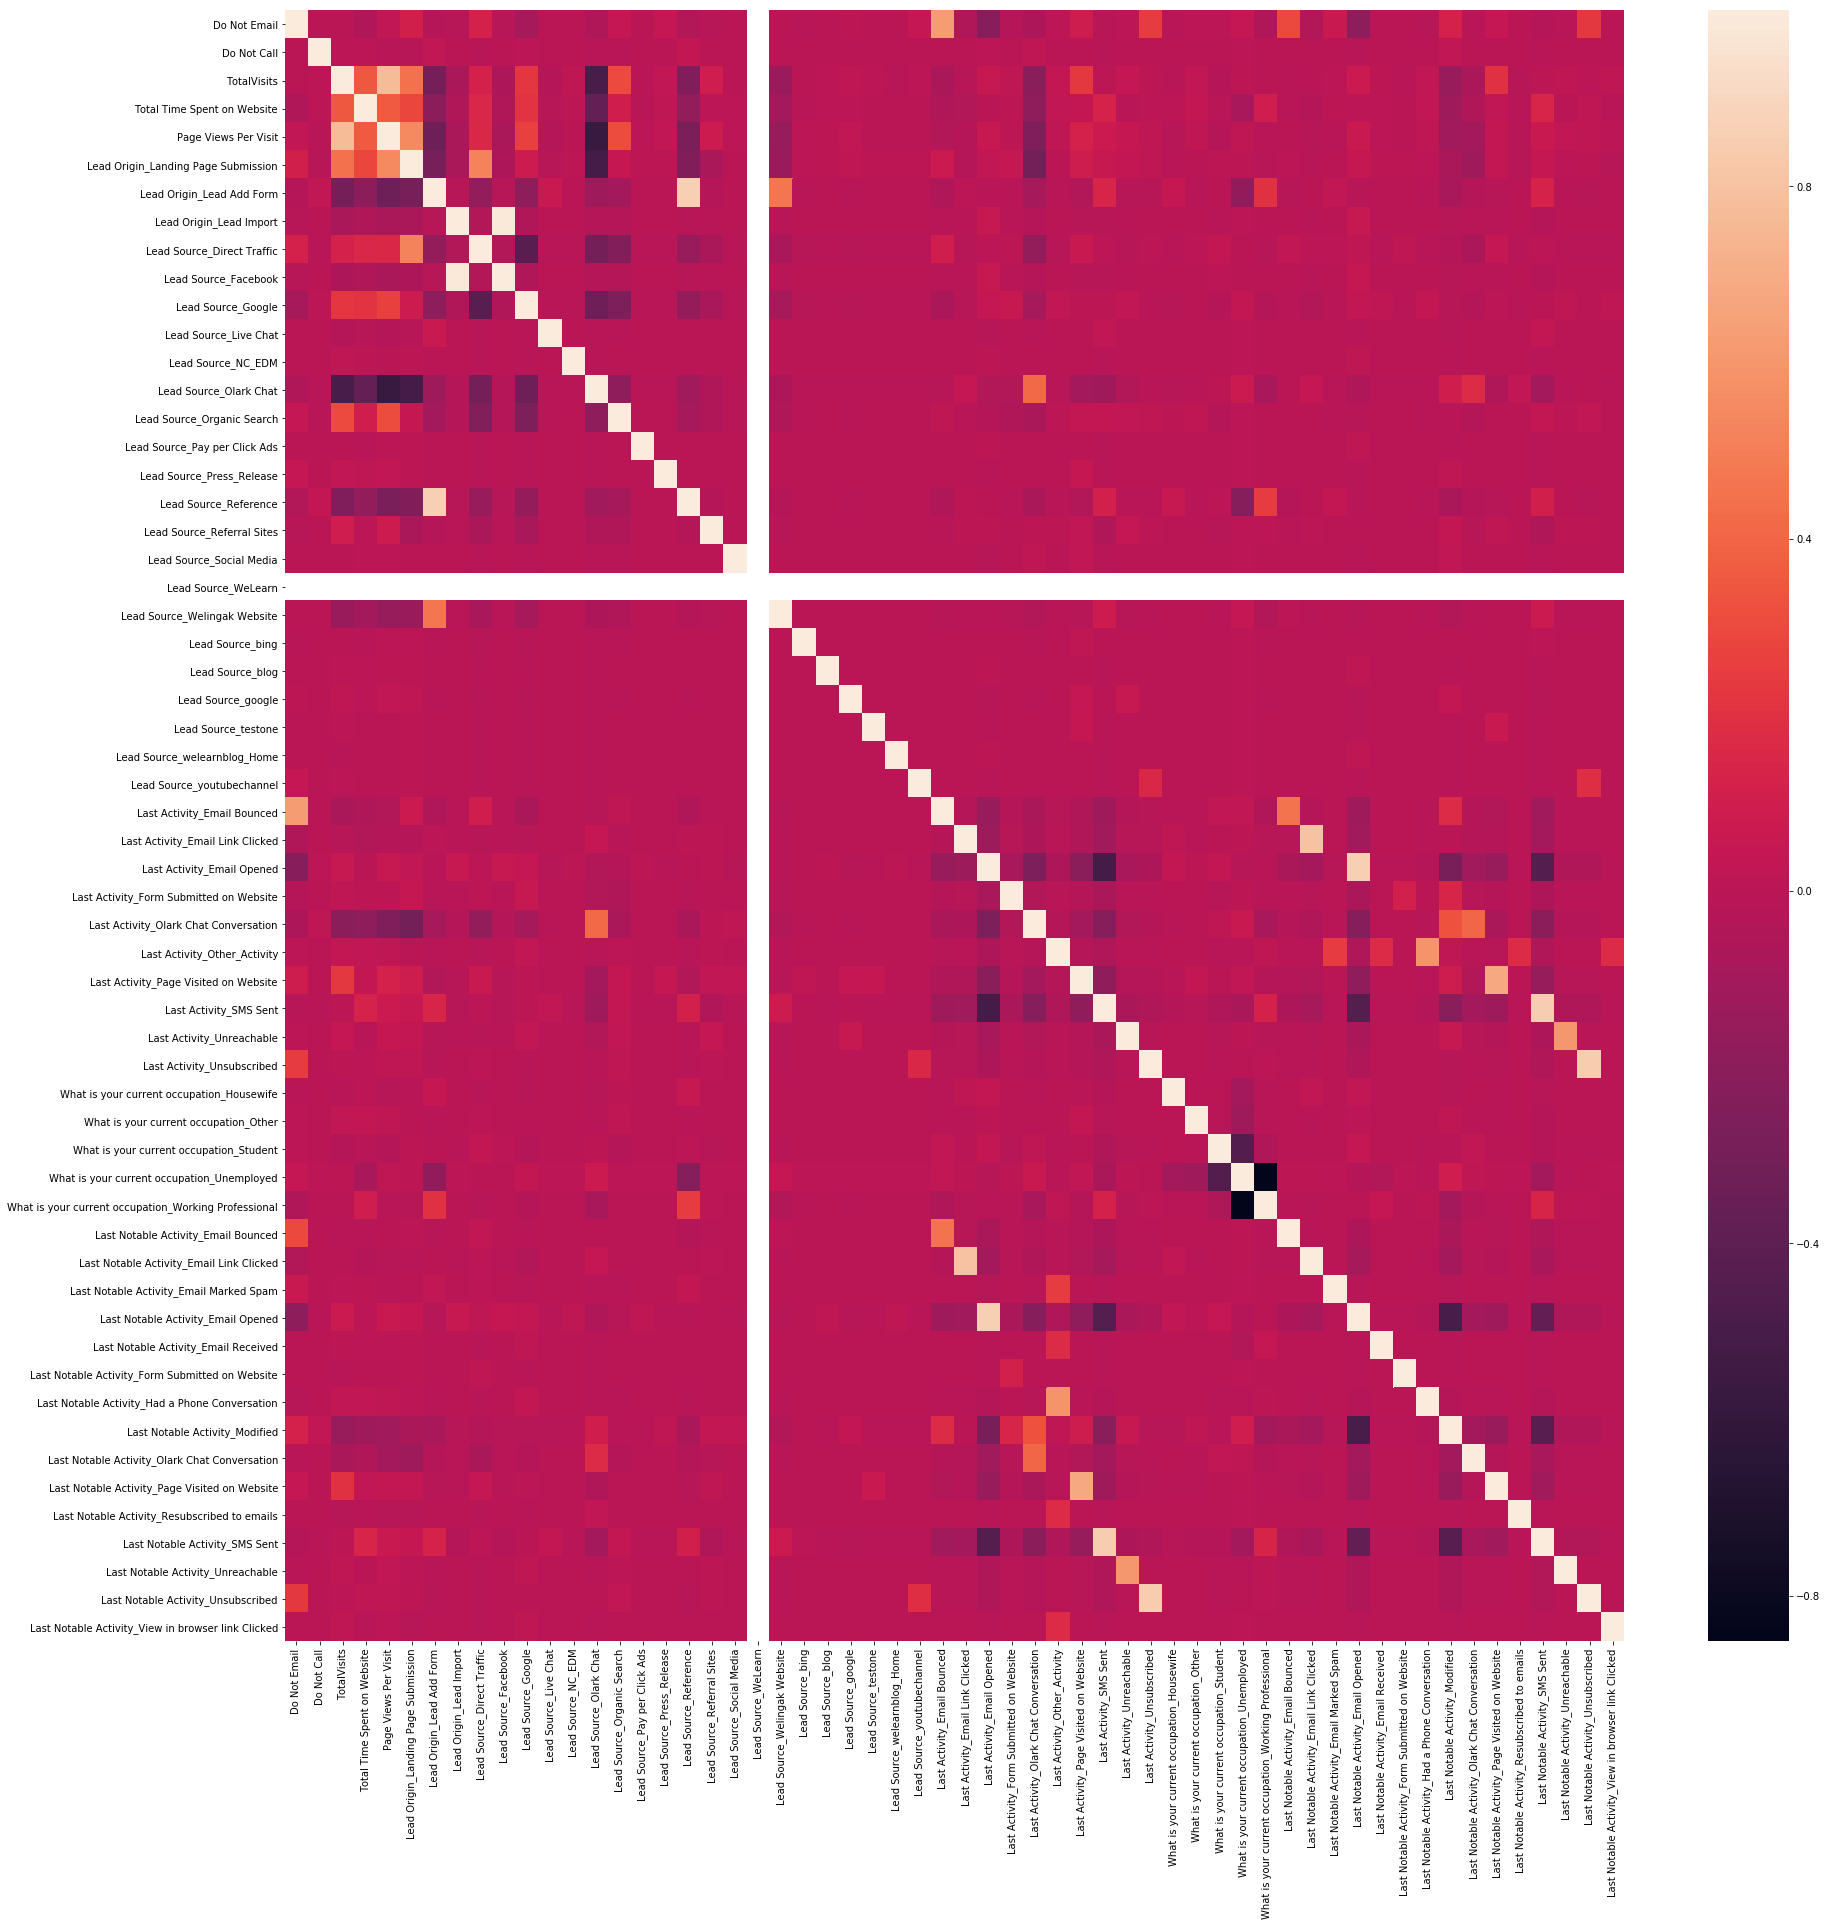

In [60]:
##Checking the correlation among varibles
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr())

In [61]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\sensa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sensa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
# Checking the Churn Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

At this point, we have around 38% conversion

In [63]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        23:42:14   Pearson chi2:                 7.99e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  3.28e+15   9.67e+07   3.39e+07      0.000    3.28e+15    3.28e+15
Do Not Email                                         -2.962e+14   4.42e+06   -6.7e+07      0.000   -2.96e+14   -2.96e+14
Do Not Call                                           2.595e+15   4.76e+07   5.45e+07      0.000    2.59e+15    2.59e+15
TotalVisits                                           2.553e+14   1.43e+06   1.79e+08      0.000    2.55e+14    2.55e+14
Total Time Spent on Website                           7.524e+14   9.76e+05   7.71e+08      0.000    7.52e+14    7.52e+14
Page Views Per Visit                                 -1.897e+14   1.57e+06  -1.21e+08      0.000    -1.9e+14    -1.9e+14
Lead Origin_Landing Page Submission                  -5.532e+13   2.53e+06  -2.18e+07      0.000   -5.53e+13   -5.53e+13
Lead Origin_Lead Add Form                             1.477e+14   4.76e+07    3.1e+06      0.000    1.48e+14    1.48e+14
Lead Origin_Lead Import                               2.324e+15   6.88e+07   3.38e+07      0.000    2.32e+15    2.32e+15
Lead Source_Direct Traffic                           -8.299e+13   6.15e+07  -1.35e+06      0.000    -8.3e+13    -8.3e+13
Lead Source_Facebook                                 -3.892e+15   9.12e+07  -4.27e+07      0.000   -3.89e+15   -3.89e+15
Lead Source_Google                                    2.401e+14   6.15e+07   3.91e+06      0.000     2.4e+14     2.4e+14
Lead Source_Live Chat                                 5.679e+15   6.13e+07   9.26e+07      0.000    5.68e+15    5.68e+15
Lead Source_NC_EDM                                    3.412e+15   9.11e+07   3.75e+07      0.000    3.41e+15    3.41e+15
Lead Source_Olark Chat                               -3.984e+14   6.13e+07  -6.49e+06      0.000   -3.98e+14   -3.98e+14
Lead Source_Organic Search                           -3.991e+13   6.15e+07  -6.49e+05      0.000   -3.99e+13   -3.99e+13
Lead Source_Pay per Click Ads                        -3.984e+15    9.1e+07  -4.38e+07      0.000   -3.98e+15   -3.98e+15
Lead Source_Press_Release                            -5.105e+15   9.14e+07  -5.58e+07      0.000    -5.1e+15    -5.1e+15
Lead Source_Reference                                 1.703e+15    3.9e+07   4.37e+07      0.000     1.7e+15     1.7e+15
Lead Source_Referral Sites                           -8.311e+13   6.19e+07  -1.34e+06      0.000   -8.31e+13   -8.31e+13
Lead Source_Social Media                              1.134e+14   7.77e+07   1.46e+06      0.000    1.13e+14    1.13e+14
Lead Source_WeLearn                                     31.7611   8.38e-07   3.79e+07      0.000      31.761      31.761
Lead Source_Welingak Website                          1.802e+15   3.94e+07   4.58e+07      0.000     1.8e+15     1.8e+15
Lead Source_bing

### FEATURE SELECTION USING RECURSIVE FEATURE ELIMINATION

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_blog', False, 28),
 ('Lead Source_google', False, 12),
 ('Lead Source_testone', Fals

In [67]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'Last Notable

In [69]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.6
Date:                Mon, 10 Jun 2019   Deviance:                       5407.3
Time:                        23:42:17   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8467      0.200     -4.229      0.000      -1.239      -0.454
Do Not Email                                            -1.8223      0.182    -10.020      0.000      -2.179      -1.466
Total Time Spent on Website                              1.1415      0.040     28.637      0.000       1.063       1.220
Lead Origin_Lead Add Form                                2.3063      0.920      2.506      0.012       0.502       4.110
Lead Origin_Lead Import                                  1.5368      0.463      3.322      0.001       0.630       2.443
Lead Source_Olark Chat                                   1.3298      0.103     12.902      0.000       1.128       1.532
Lead Source_Reference                                    1.7068      0.945      1.806      0.071      -0.145       3.559
Lead Source_Welingak Website                             3.7007      1.170      3.163      0.002       1.407       5.994
Last Activity_Olark Chat Conversation                   -1.4002      0.161     -8.718      0.000      -1.715      -1.085
Last Activity_Other_Activity                             1.4771      0.529      2.794      0.005       0.441       2.513
Last Activity_SMS Sent                                   1.3825      0.074     18.724      0.000       1.238       1.527
Last Activity_Unsubscribed                               1.6250      0.469      3.465      0.001       0.706       2.544
What is your current occupation_Unemployed              -0.6676      0.202     -3.311      0.001      -1.063      -0.272
What is your current occupation_Working Professional     2.1063      0.268      7.850      0.000       1.580       2.632
Last Notable Activity_Had a Phone Conversation           2.2637      1.215      1.863      0.062      -0.118       4.645
Last Notable Activity_Unreachable                        1.9154      0.475      4.029      0.000       0.984       2.847
========================================================================================================================
"""

In [70]:
#col1 = cols.drop('What is your current occupation_Housewife',1)
#col1

In [71]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.6
Date:                Mon, 10 Jun 2019   Deviance:                       5407.3
Time:                        23:42:17   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8467      0.200     -4.229      0.000      -1.239      -0.454
Do Not Email                                            -1.8223      0.182    -10.020      0.000      -2.179      -1.466
Total Time Spent on Website                              1.1415      0.040     28.637      0.000       1.063       1.220
Lead Origin_Lead Add Form                                2.3063      0.920      2.506      0.012       0.502       4.110
Lead Origin_Lead Import                                  1.5368      0.463      3.322      0.001       0.630       2.443
Lead Source_Olark Chat                                   1.3298      0.103     12.902      0.000       1.128       1.532
Lead Source_Reference                                    1.7068      0.945      1.806      0.071      -0.145       3.559
Lead Source_Welingak Website                             3.7007      1.170      3.163      0.002       1.407       5.994
Last Activity_Olark Chat Conversation                   -1.4002      0.161     -8.718      0.000      -1.715      -1.085
Last Activity_Other_Activity                             1.4771      0.529      2.794      0.005       0.441       2.513
Last Activity_SMS Sent                                   1.3825      0.074     18.724      0.000       1.238       1.527
Last Activity_Unsubscribed                               1.6250      0.469      3.465      0.001       0.706       2.544
What is your current occupation_Unemployed              -0.6676      0.202     -3.311      0.001      -1.063      -0.272
What is your current occupation_Working Professional     2.1063      0.268      7.850      0.000       1.580       2.632
Last Notable Activity_Had a Phone Conversation           2.2637      1.215      1.863      0.062      -0.118       4.645
Last Notable Activity_Unreachable                        1.9154      0.475      4.029      0.000       0.984       2.847
========================================================================================================================
"""

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.154829
1012    0.235200
9226    0.545788
4750    0.851193
7987    0.897636
1281    0.713947
2880    0.074448
4971    0.885074
7536    0.833954
1248    0.879640
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15482924, 0.23519962, 0.5457875 , 0.85119265, 0.89763586,
       0.71394742, 0.07444829, 0.88507371, 0.83395356, 0.87963962])

In [74]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.154829,3009
1,0,0.235200,1012
2,0,0.545788,9226
3,1,0.851193,4750
4,1,0.897636,7987


In [75]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.154829,3009,0
1,0,0.235200,1012,0
2,0,0.545788,9226,1
3,1,0.851193,4750,1
4,1,0.897636,7987,1


In [76]:
from sklearn import metrics

# Confusion matrix results
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3432  473]
 [ 734 1712]]


In [77]:
#checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.809951188789167


#### Checking VIF

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.40
5,Lead Source_Reference,48.07
6,Lead Source_Welingak Website,15.46
11,What is your current occupation_Unemployed,1.99
4,Lead Source_Olark Chat,1.74
9,Last Activity_SMS Sent,1.60
8,Last Activity_Other_Activity,1.56
13,Last Notable Activity_Had a Phone Conversation,1.55
7,Last Activity_Olark Chat Conversation,1.42
1,Total Time Spent on Website,1.31


In [80]:
#Checking other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6999182338511856

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.8788732394366198

In [83]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12112676056338029


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.7835240274599542


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8238118098895824


### PLOTTING THE ROC CURVE
This curve shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

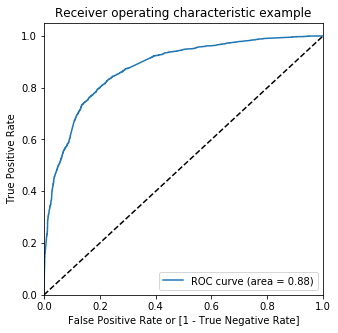

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [89]:
#Finding the optimal cutoff point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.154829,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.235200,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.545788,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.851193,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.897636,7987,1,1,1,1,1,1,1,1,1,1,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.601952  0.966067  0.373880
0.2   0.2  0.728862  0.921096  0.608451
0.3   0.3  0.791214  0.834832  0.763892
0.4   0.4  0.808849  0.760016  0.839437
0.5   0.5  0.809951  0.699918  0.878873
0.6   0.6  0.786805  0.571954  0.921383
0.7   0.7  0.776256  0.504497  0.946479
0.8   0.8  0.754527  0.411284  0.969526
0.9   0.9  0.704771  0.252249  0.988220


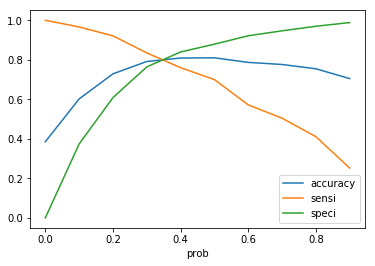

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.154829,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.235200,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.545788,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.851193,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.897636,7987,1,1,1,1,1,1,1,1,1,1,0,1


#### Assigning the Lead Score

In [93]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.154829,3009,0,1,1,0,0,0,0,0,0,0,0,0,15
1,0,0.235200,1012,0,1,1,1,0,0,0,0,0,0,0,0,24
2,0,0.545788,9226,1,1,1,1,1,1,1,0,0,0,0,1,55
3,1,0.851193,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.897636,7987,1,1,1,1,1,1,1,1,1,1,0,1,90


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)



0.8088490001574555

In [95]:
# Confusion Matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2



array([[3278,  627],
       [ 587, 1859]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7600163532297629

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.8394366197183099

In [99]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16056338028169015


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7477876106194691


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.848124191461837


### Precision and Recall

In [102]:
#Check the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3432,  473],
       [ 734, 1712]], dtype=int64)

In [103]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7835240274599542

In [104]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6999182338511856

In [105]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [106]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.7835240274599542

In [107]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6999182338511856

### Precision and Recall Tradeoff

In [108]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
        ..
 6301    1
 6302    0
 6303    1
 6304    1
 6305    1
 6306    1
 6307    0
 6308    0
 6309    0
 6310    1
 6311    1
 6312    0
 6313    0
 6314    0
 6315    1
 6316    1
 6317    1
 6318    0
 6319    0
 6320    0
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

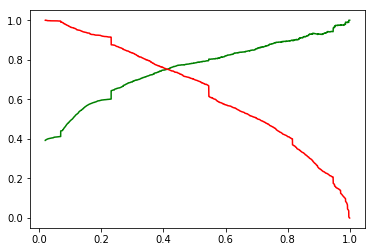

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the test set

In [111]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\sensa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sensa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [112]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,0,-0.591008,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.894051,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.878732,1,0,0,1,0,0,0,0,0,0,0,0,0
3830,0,-0.578179,0,0,0,0,0,0,0,0,0,1,0,0,0


In [113]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [114]:
y_test_pred = res.predict(X_test_sm)

In [115]:
y_test_pred[:10]

3271    0.100751
1490    0.968372
7936    0.086074
4216    0.896906
3830    0.102085
1800    0.602404
6507    0.296295
4821    0.251495
4223    0.946758
4714    0.548593
dtype: float64

In [116]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.100751
1490,0.968372
7936,0.086074
4216,0.896906
3830,0.102085


In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [118]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.100751
1,1,1490,0.968372
2,0,7936,0.086074
3,1,4216,0.896906
4,0,3830,0.102085


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.100751
1,1490,1,0.968372
2,7936,0,0.086074
3,4216,1,0.896906
4,3830,0,0.102085


In [123]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.100751,0
1,1490,1,0.968372,1
2,7936,0,0.086074,0
3,4216,1,0.896906,1
4,3830,0,0.102085,0


In [124]:
#check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.803892765332354

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1451,  283],
       [ 251,  738]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7462082912032356

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8367935409457901